In [1]:
import dask.dataframe as dd
#pip install dask[complete] toolz cloudpickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


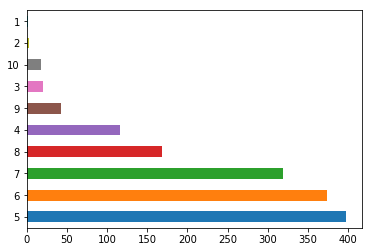

Skewness 1.882876
Kurtosis 6.536282


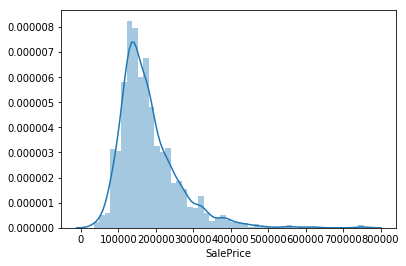

In [2]:

%matplotlib inline

train = pd.read_csv("train.csv")

train.columns
train['SalePrice'].describe()

a = train['OverallQual'].value_counts()


a[:len(a)+1].plot(kind="barh")

plt.show()

sns.distplot(train['SalePrice'])

train.shape

train['OverallQual'].head(10)

train['YrSold'].describe()

print("Skewness %f" % train['SalePrice'].skew())

print("Kurtosis %f" % train['SalePrice'].kurt())


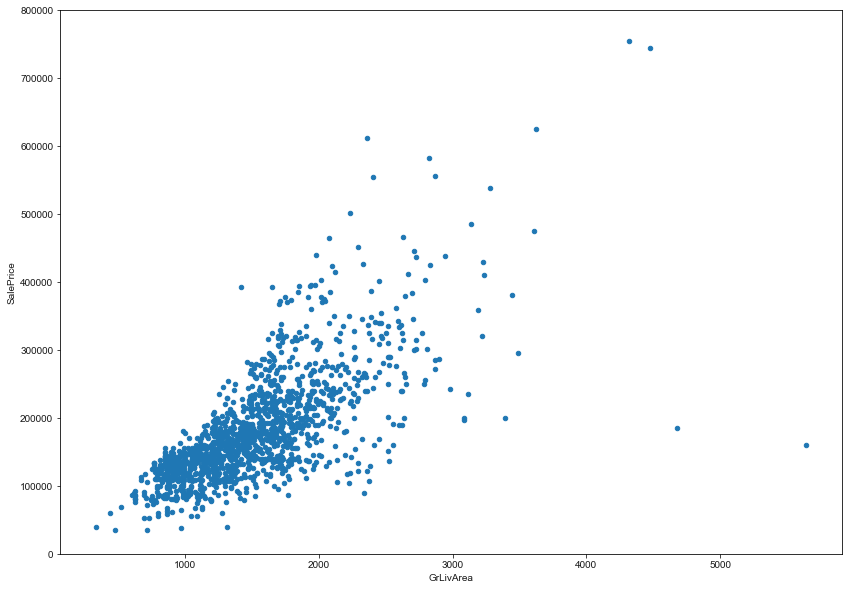

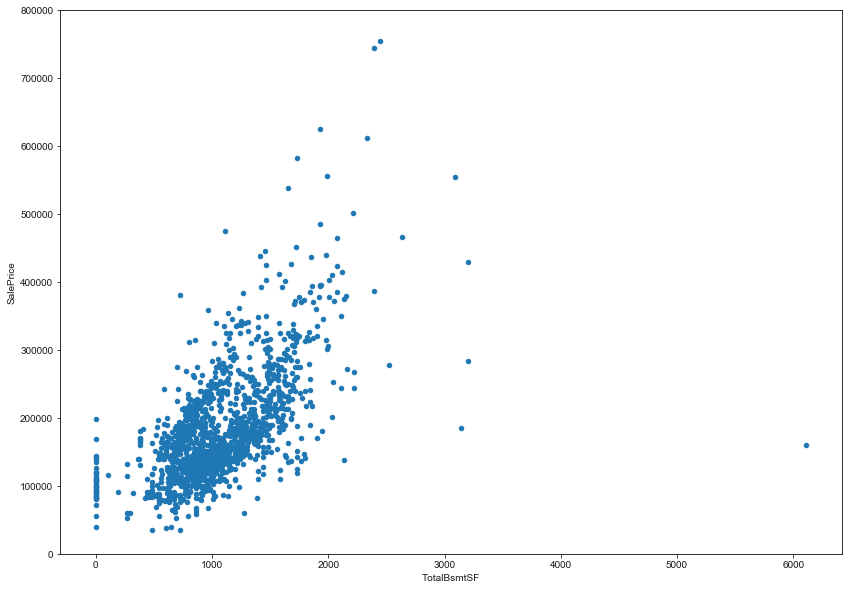

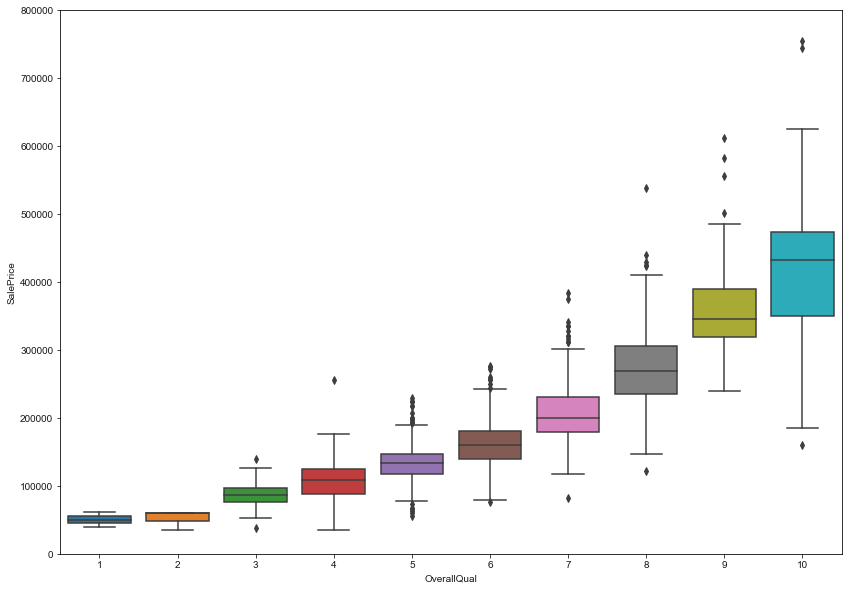

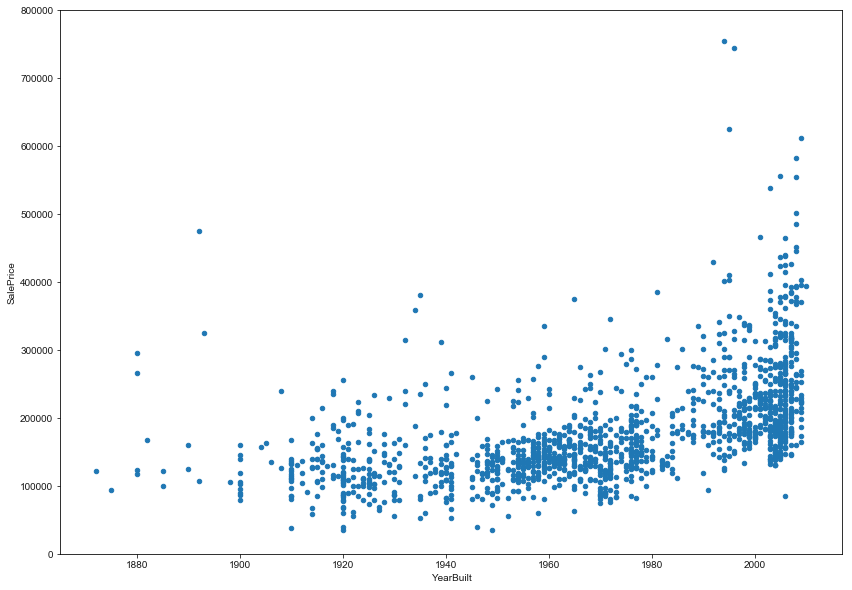

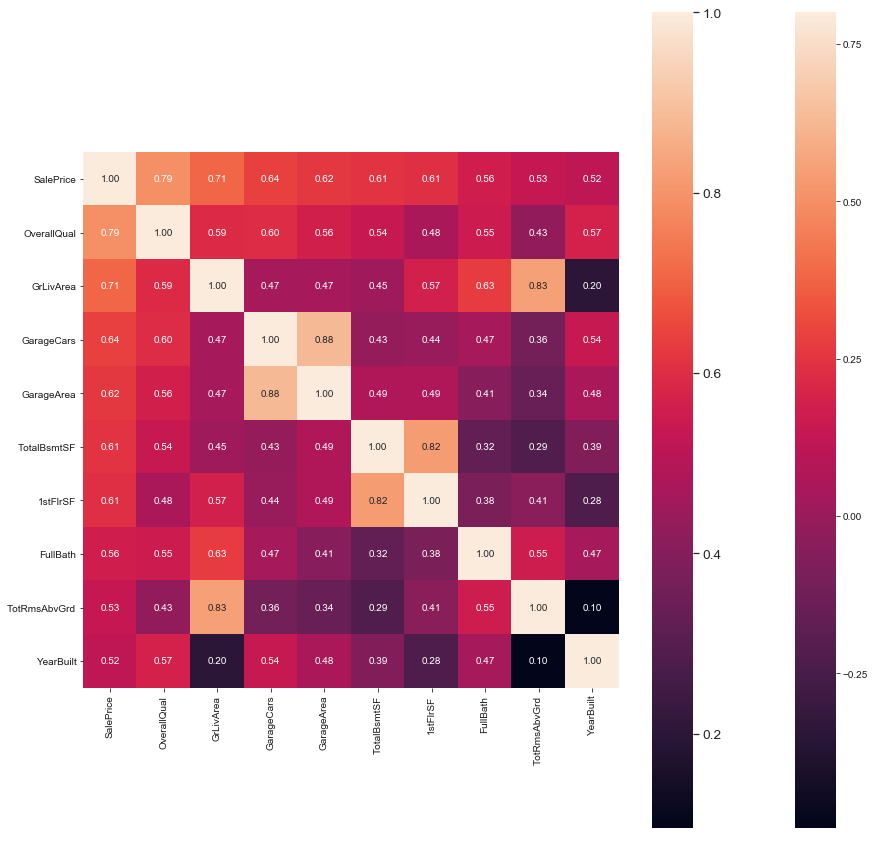

In [3]:

train['GrLivArea'].describe()


var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),figsize=(14,10));


var2 = 'TotalBsmtSF'
data2 = pd.concat([train['SalePrice'], train[var2]], axis=1)
data2.plot.scatter(x=var2, y='SalePrice', ylim=(0,800000),figsize=(14,10))


train['OverallQual'].value_counts()
train['OverallQual'].isnull().sum()

var3 = 'OverallQual'
data3 = pd.concat([train['SalePrice'],train[var3]],axis=1)
f,ax = plt.subplots(figsize=(14,10))
fig = sns.boxplot(x=var3,y='SalePrice',data=data3)
fig.axis(ymin=0,ymax=800000)


train['YearBuilt'].value_counts()
train['YearBuilt'].isnull().sum()

var4 = 'YearBuilt'
data4 = pd.concat([train['SalePrice'],train[var4]],axis=1)
data4.plot.scatter(x=var4,y='SalePrice',ylim=(0,800000),figsize=(14,10))

train['MSZoning'].isnull().sum()


corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True)


k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


C:\Users\prana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
11      2324
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
        ... 
1430    1838
1431     958
1432     968
1433    1792
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1725
1440    2555
1441     848
1442    2007
1443     952
1444    1422
1445     913
1446    1188
1447    2090
1448    1346
1449     630
1450    1792
1451    1578
1452    1072
1453    1140
1454    1221
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1456, dtype: int64


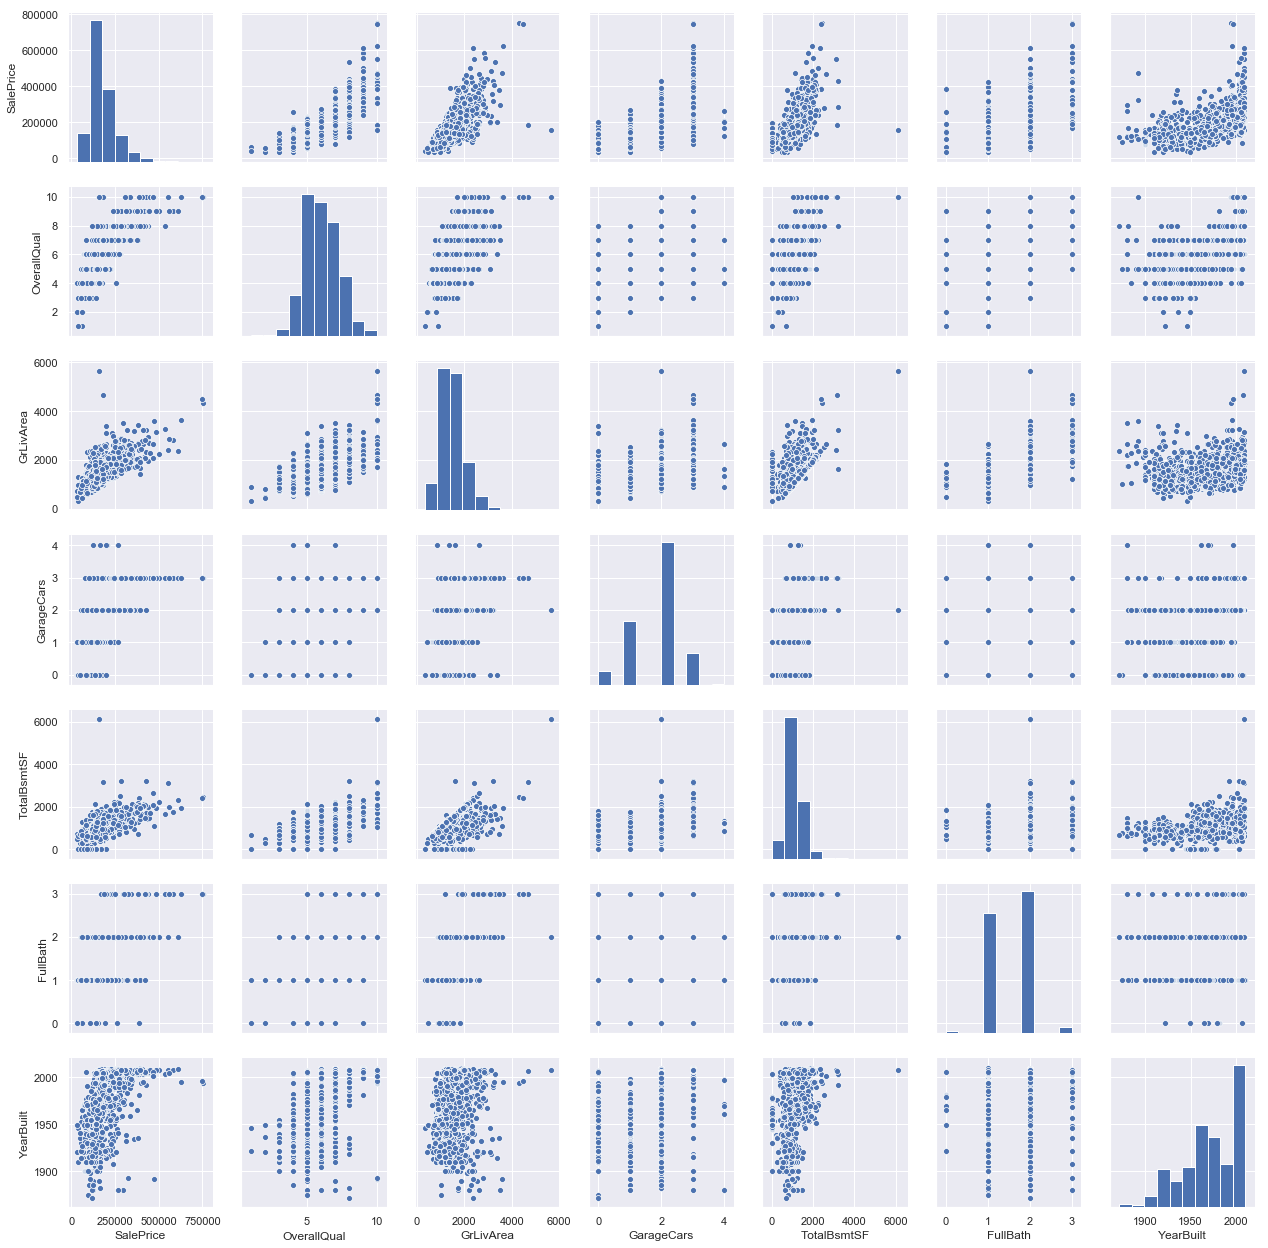

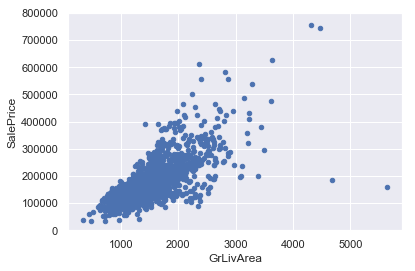

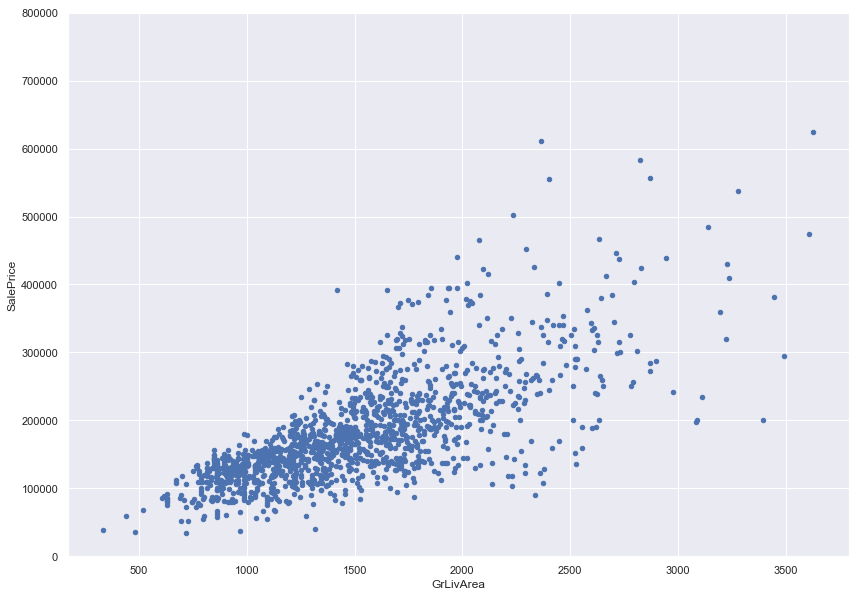

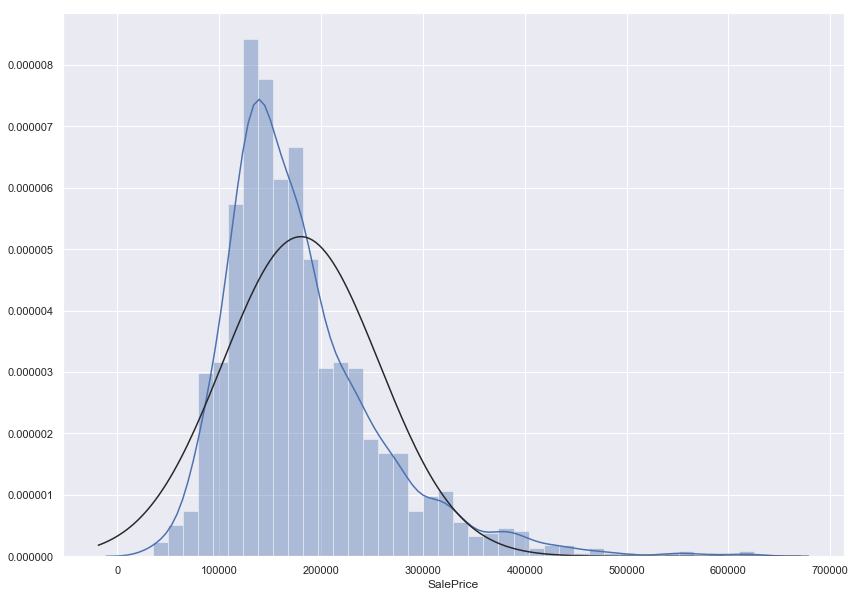

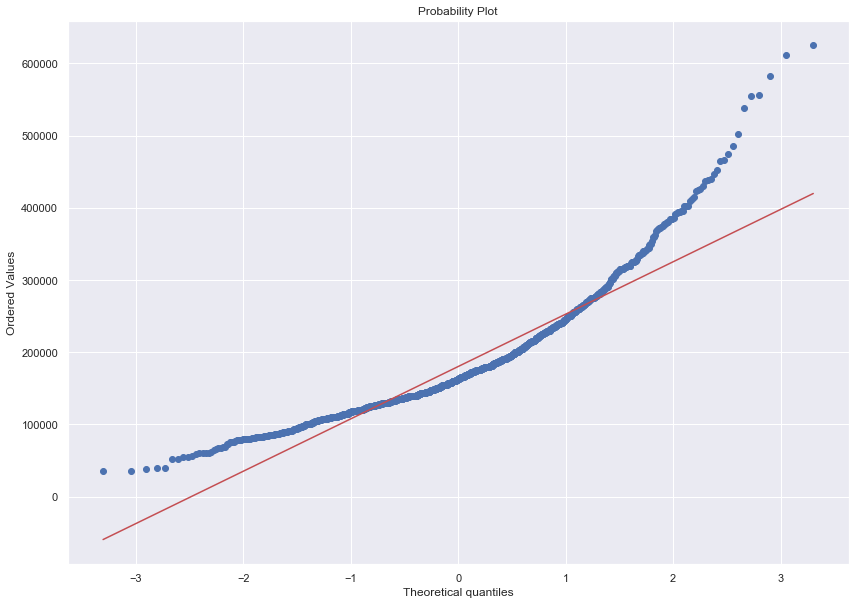

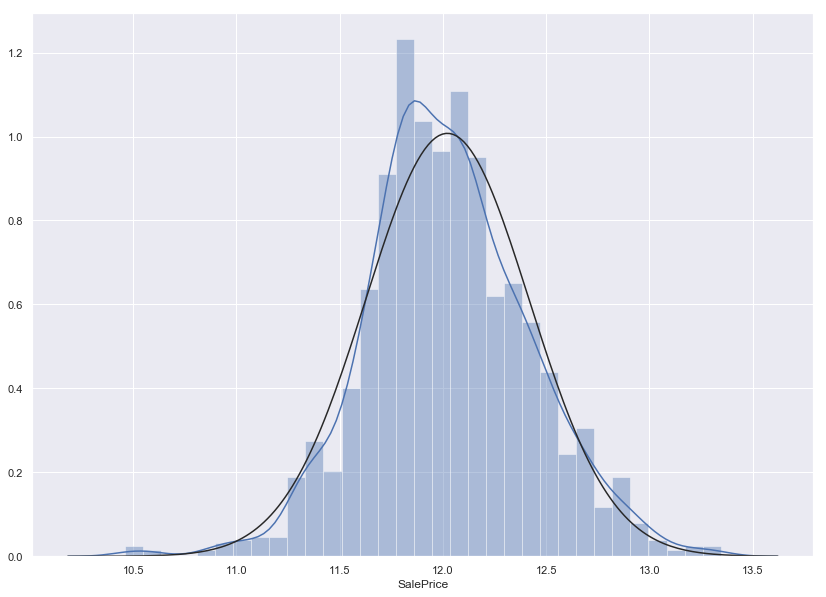

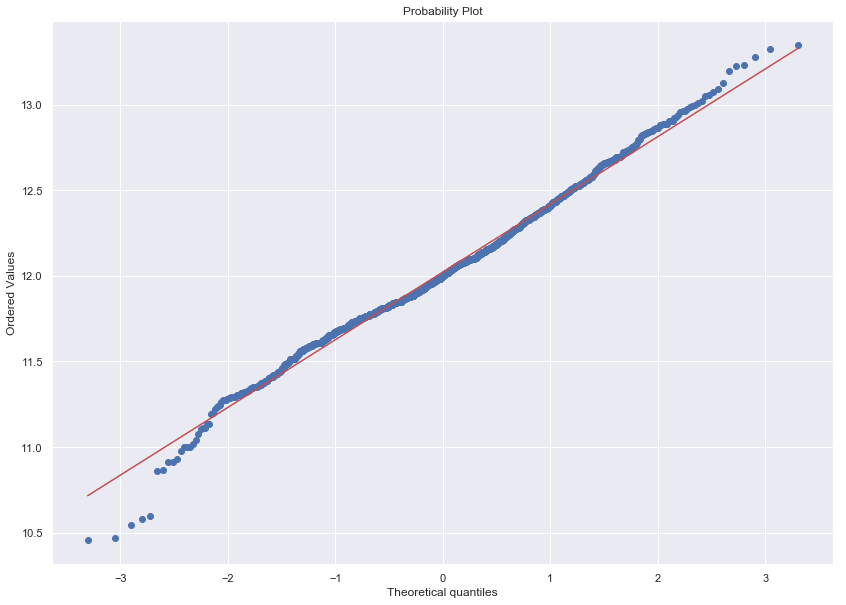

In [4]:

sns.set()

cols =['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']

sns.pairplot(train[cols],size=2.5)


total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(120)

train.shape

#variables with more than 15% of missing values should be deleted. All Garage variables have around 5% missing
#values which should be deleted. Garagecar variables gives up the most important details about garage so rest of them could be deleted.
#Electrical variable has only one missing value so missing value record is deleted and the variable could be used.


#Bivariate Analysis

var = "GrLivArea"
data = pd.concat([train["SalePrice"],train[var]], axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))

df = train[(train.GrLivArea < 4675) & (train.SalePrice < 700000)]

print(df["GrLivArea"])

#Removed outliers from GrLivArea
var = "GrLivArea"
data = pd.concat([df["SalePrice"],df[var]], axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000), figsize=(14,10))


fig = plt.figure(figsize=(14, 10))
sns.distplot(df["SalePrice"], fit=norm)
fig = plt.figure(figsize=(14, 10))
res = stats.probplot(df['SalePrice'], plot=plt)

#Log transformation
df['SalePrice']=np.log(df['SalePrice'])

fig = plt.figure(figsize=(14, 10))
sns.distplot(df["SalePrice"], fit=norm)
fig = plt.figure(figsize=(14, 10))
res = stats.probplot(df['SalePrice'], plot=plt)


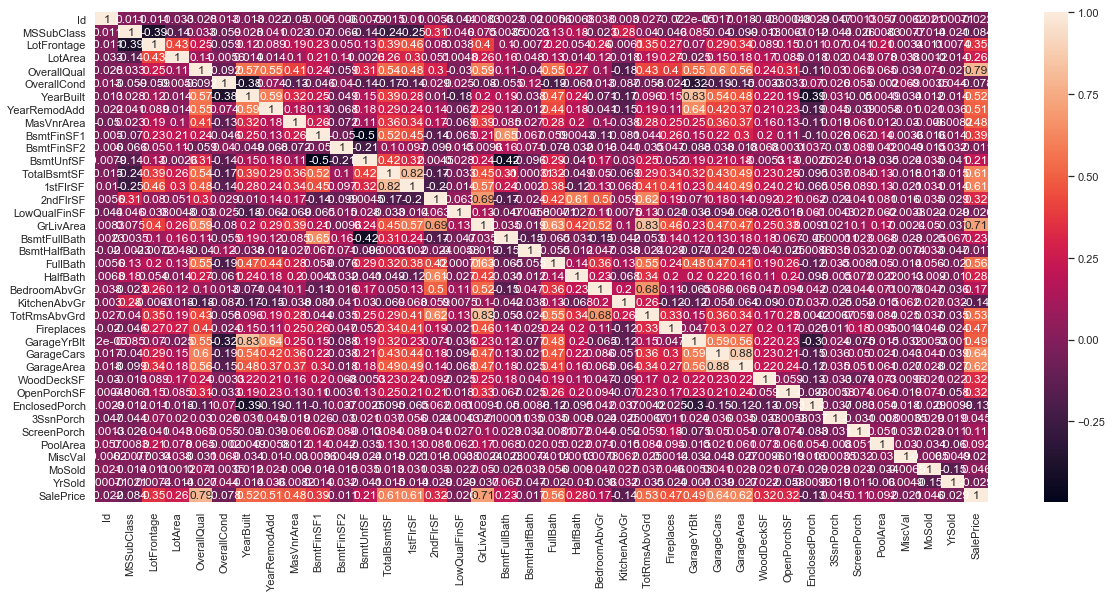

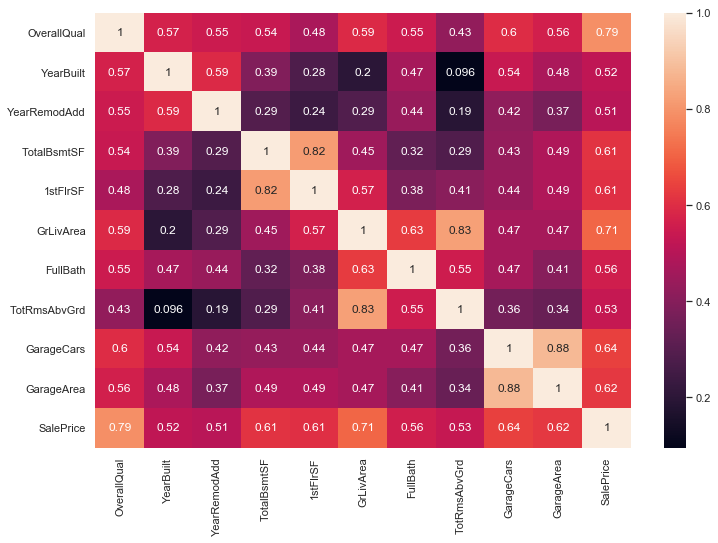

C:\Users\prana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


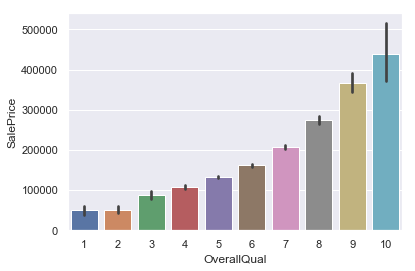

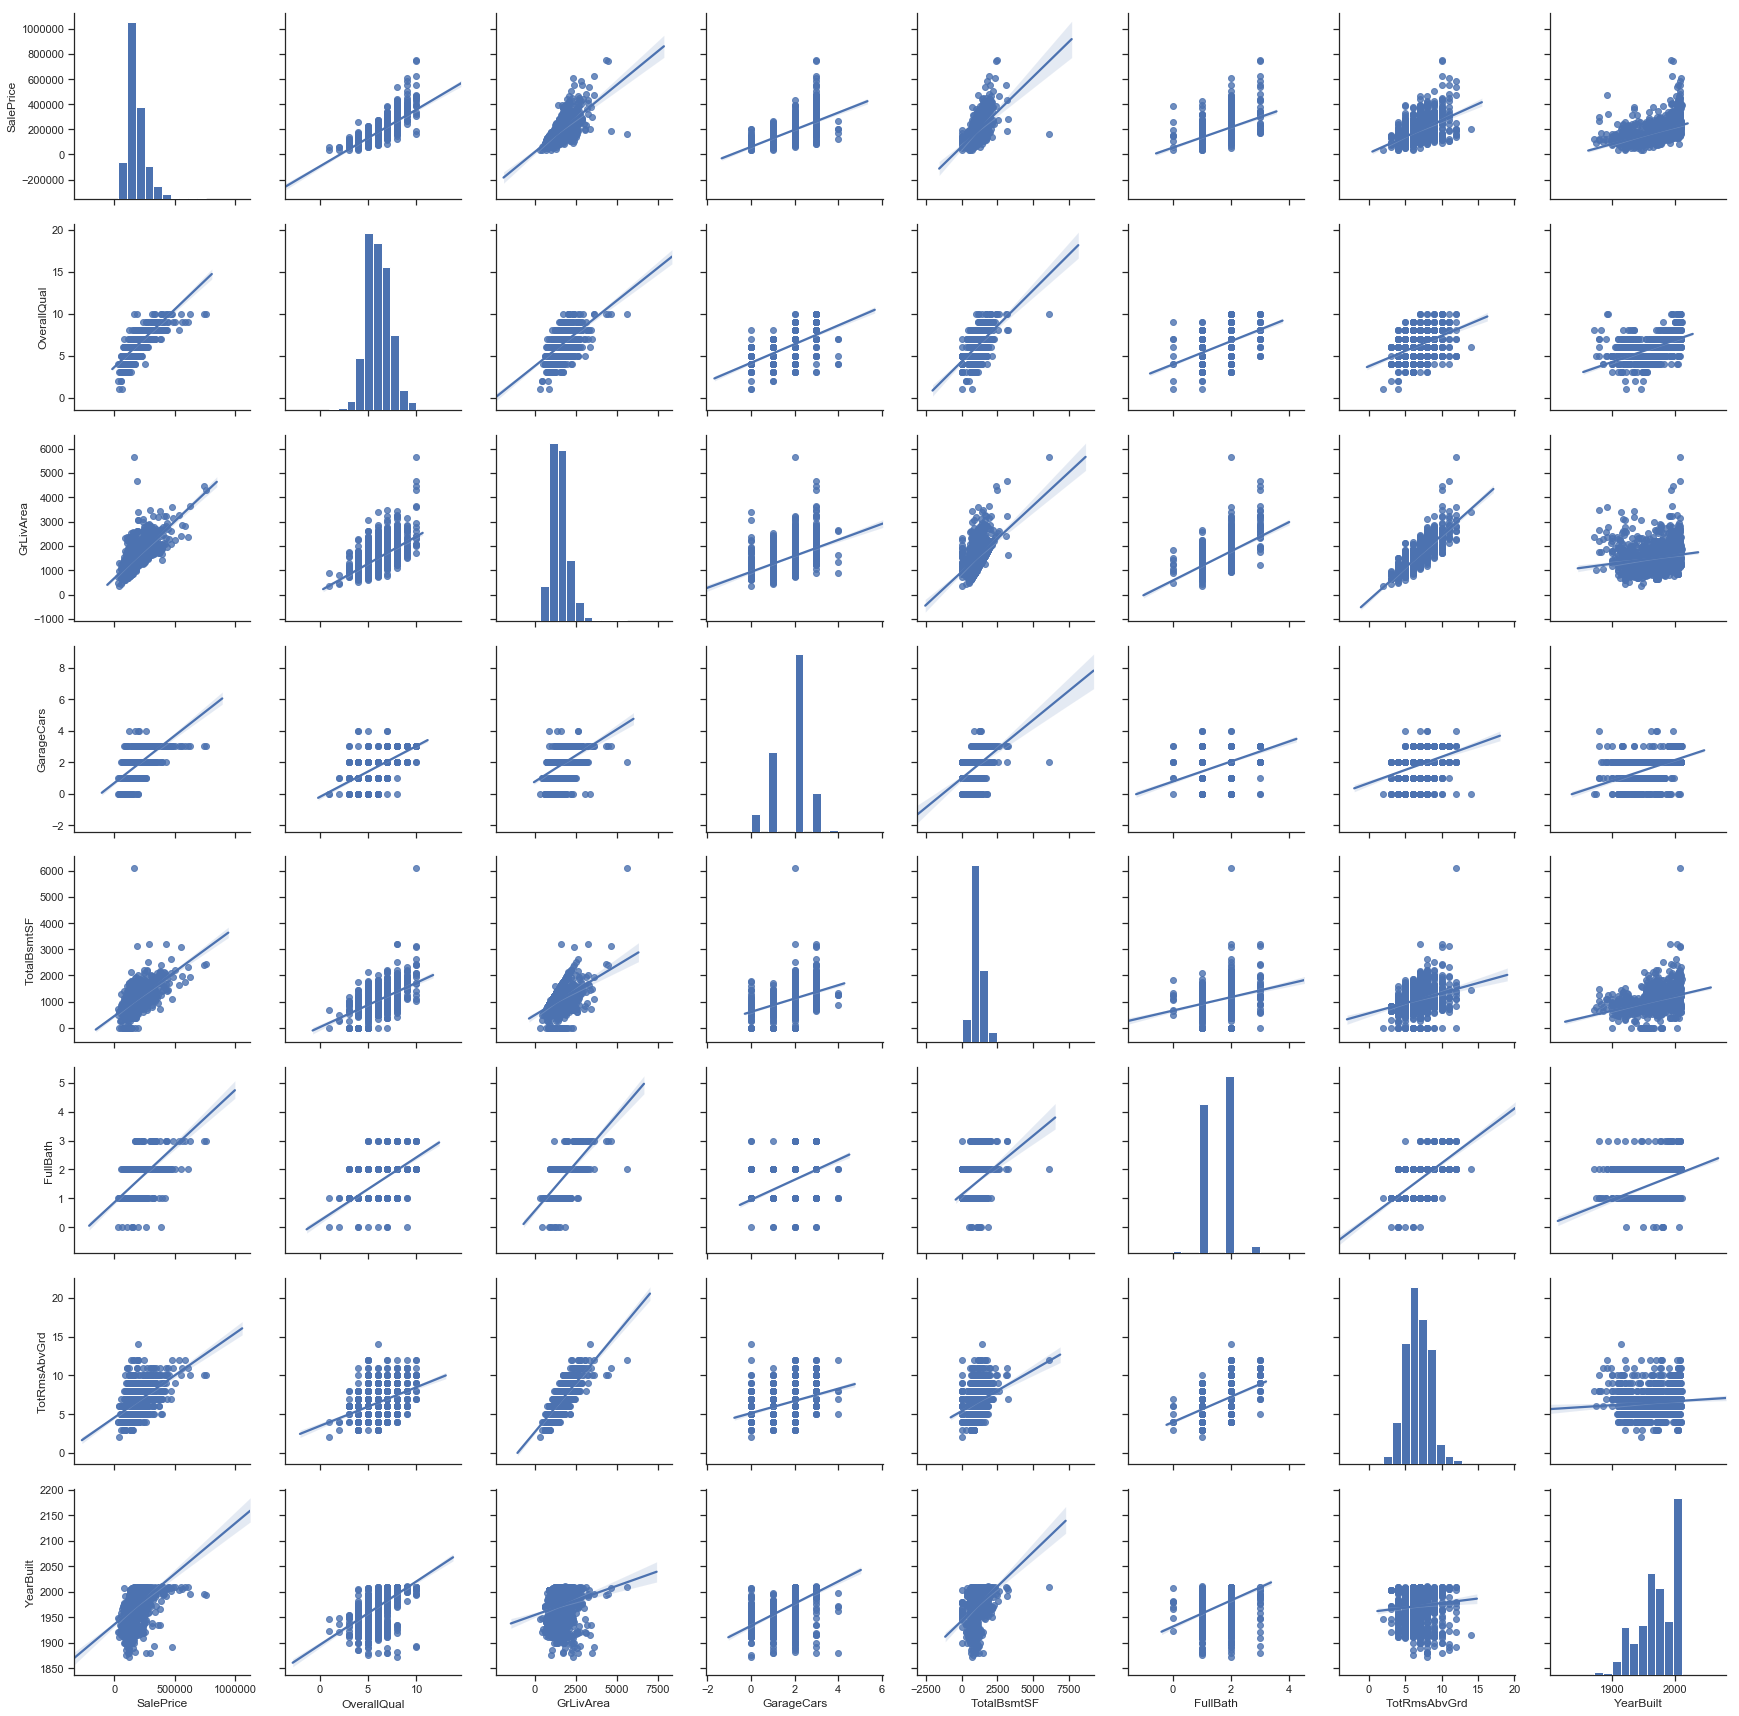

In [5]:

##########

train_corr = train.select_dtypes(include=[np.number])


corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)


top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()


train.OverallQual.unique()

sns.barplot(train.OverallQual, train.SalePrice)



col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

#Missing value imputation
train['PoolQC'] = train['PoolQC'].fillna('None')

train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')


In [6]:

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))    

train['MasVnrType'] = train['MasVnrType'].fillna('None')

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')


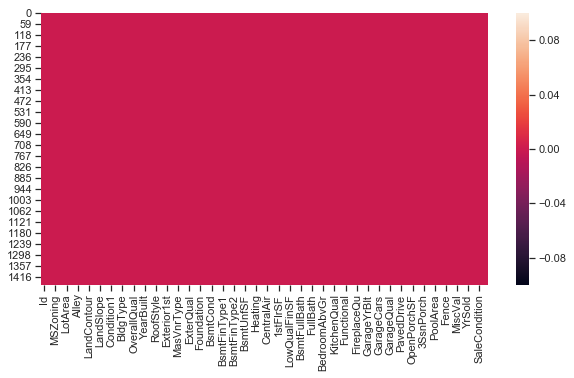

In [7]:

train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

train = train.drop(['Utilities'], axis=1)

plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

#Data Transformation
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    
y = train['SalePrice']

del train['SalePrice']


In [14]:

##### Linear Regression
from sklearn import linear_model
model = linear_model.LinearRegression()

X = train.values
y = y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


model.fit(X_train, y_train)

print("Predict value " + str(model.predict([X_test[200]])))
print("Real value " + str(y_test[200]))

print("Linear Regression Accuracy --> ", model.score(X_test, y_test)*100)


Predict value [341418.00039836]
Real value 378500
Linear Regression Accuracy -->  86.26650707450929


In [15]:


###### RandomForestRegression

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

model.fit(X_train, y_train)

print("Random Forest Accuracy --> ", model.score(X_test, y_test)*100)


Random Forest Accuracy -->  90.42800584152874


In [17]:

######  Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

GBR.fit(X_train, y_train)

print("Gradient Boosting Accuracy --> ", GBR.score(X_test, y_test)*100)

Gradient Boosting Accuracy -->  91.88444596848052
